#Customer Segmentation

##OverView

**📊 About the project**
Customer Personality Analysis is all about getting to know a company’s ideal customers on a deeper level. By understanding who they are, what they like, and how they behave, businesses can better tailor their products to fit the unique needs of different customer groups.

**🧩 Attributes**
- People
  - ID: Customer's unique identifier
  - Year_Birth: Customer's birth year
  - Education: Customer's education level
  - Marital_Status: Customer's marital status
  - Income: Customer's yearly household income
  - Kidhome: Number of children in customer's household
  - Teenhome: Number of teenagers in customer's household
  - Dt_Customer: Date of customer's enrollment with the company
  - Recency: Number of days since customer's last purchase
  - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products
  - MntWines: Amount spent on wine in last 2 years
  - MntFruits: Amount spent on fruits in last 2 years
  - MntMeatProducts: Amount spent on meat in last 2 years
  - MntFishProducts: Amount spent on fish in last 2 years
  - MntSweetProducts: Amount spent on sweets in last 2 years
  - MntGoldProds: Amount spent on gold in last 2 years
- Promotion
  - NumDealsPurchases: Number of purchases made with a discount
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Place
  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month


**🎯 Target**
We need to perform clustering to summarize and understand customer segments. This unsupervised task will help us identify distinct groups within our customer base.

##Importing Required Libraries

In [ ]:
!pip install summarytools

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import warnings
warnings.filterwarnings('ignore')


##Loading Data

In [ ]:
#Loading the dataset
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


##EDA

###Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
  dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 5592.2 (3246.7)min < med < max:0.0 < 5458.5 < 11191.0IQR (CV) : 5599.5 (1.7),"2,240 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiklEQVR4nO3dy4riQBSA4VNjq+WFBC/ozhdomIXgJg8wy3nYeYQWXMzaN3AniChmOhhjZjNCD7SXVAw52v+3lep28VunKtK0SdNUAC2+lf0GgI9eyn4DeEzGmIaI1ByX79M0ff/sBYJEZsaYRq/X++l5Xsdl/Xa7XRtjfn0WJUHCRc3zvE4QBO++70dZFm42GzubzTqr1aomIgR5SVFj6Fn5vh8NBoM/Dksb514gyH+KHEO43dMFmWOX89rt9iAIgu29xxBupzLIHFHZbrf7w/f9VtaFcRzbJEle6/X6273HEG6nLsg8ozOOYysir5PJ5He/399mWbtYLDrz+bx5OBwqWX8v7udikCUd8p1vcKeorLVx1l1uvV7n2uGSJKmKiGeMcVn+5S5E55wNsuxDvssNLm9UrsIwrMZx/H00GlUqlUqmD5EIF6KPLu2QuZ41TafTwWq16htjMo1OEfGOx2M145pS7ff7F2ttczweR8PhcJ1lLRei/109Q7rsVHl2jNPlIoqiNxFxuVyUptVqOT2XS5LEE8a9iBR0qcmzY3y1y0WZ4z7PI7Kipliht2yXHaOsc2BZyhr3eZ9mFDXF1D32+apKGPfOXwQUOcUI8oHd46zu8kVAkVOMIB/YM57VCfIJPNNZnT9hgCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVCFIqEKQUIUgoQpBQhWChCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqlz9X4ebzcZm/aG73c6KiIRhaJfLZZO1rD251tNf7U2RkAup9qMAAAAASUVORK5CYII="">",0(0.0%)
2,Year_Birth[int64],Mean (sd) : 1968.8 (12.0)min < med < max:1893.0 < 1970.0 < 1996.0IQR (CV) : 18.0 (164.3),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACH0lEQVR4nO3csYriUBSH8XM3oxN1SVBBO19gYQtL+233YfcRtrDY2jewEyVEzE4wxmy1MNVAkpvJf8bv18qBW3wI0ZPrqqoyQMWXvg8AvPbU9wHQjnNuZGbDhuPXqqpefJ6nLYL8wJxzo/l8/jOKommT+fP5nDjnfilFSZAf2zCKoulms3mJ4zivM5imabjdbqen02loZgQJf+I4zheLxd8GoyPvh2mJhxpIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhI4Z8aAS0WJKL7/T7wfZ4+EWTP2ixIFEURlmX5Lc/z32bW5K9DOQTZv8YLEvv9frrb7ca32y3o6nDvjSBFNFmQSJKk1XJEWZYDM4ucc03GO9mlJMgHlWXZoCiK76vVKgiCoNY3s1l3u5QE+aCu1+tTGIbj9XqdL5fLpM5sl7uUBPngJpOJ1C4lv0NCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCkFCCutnnvCilh8E6QEvavlDkH7wopYnBOlRHy9qfTY81EAKQUIKQUIKQUIKQUIKQUIKP/ugka7uBSJI1NblvUAEidq6vBeIINFYF/cC8VADKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKQQJKSxXvMLtE/17M0jnXGhmz+90lr6Fs9nsRxzHX+sO/r994ng8/qk7e7lcQjOzLMvCw+Ew/uyzaZqGb33+D1u140XXOUSGAAAAAElFTkSuQmCC"">",0(0.0%)
3,Education[object],1. Graduation2. PhD3. Master4. 2n Cycle5. Basic,"1,127 (50.3%)486 (21.7%)370 (16.5%)203 (9.1%)54 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRUlEQVR4nO3bMWrjUBiF0V+DCZNGwhi8GC9iFjuL0G6MsYokpNEUU4WkiBV0JdnnbCCP8CHxjG4zjmNBwq+lD8DjEBsxYiOmqarnqnpa+iAb9D6O4+vSh9iS3eFw+NO27X7pg2zNMAyXpmn+Cu77dm3b7k+n02vXdW9LH2Yrrtfr777v9+fz+amqxPZNu6qqruvejsfjy9KH2ZjnpQ+wNS4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMrur/JzNLH2RL/L+m2Q3DcOn7fl8+mbnJMAyXqnpf+hxb4rPw6XwWfqPGbpQUFwRi1vQa9Vq6c6tZV1kr3b9VrKuslR7DmtZVfnq5cy4IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMKtZVS/99MlazrrJWun8+CyfGuooYFwRikq9Rr8kHF1tXWU8RWVdZT1GVXVdZTz04FwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiIyayrrKeoiq4rrKewmfhxFhXEfOTJ5snFTeZPHgxYOFWkwYvBixM8ZPBiwELN/GjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiJq2rrKWYYvK6ylqKW9kgEGNdRcxXTzZPLGbxaV1lNcVcPqyrrKaY01frKqspZuFHXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEfFhXWU0xp0/rKqsp5mKDQIx1FTEuCMSIjZh/O3UON/LmBqQAAAAASUVORK5CYII="">",0(0.0%)
4,Marital_Status[object],1. Married2. Together3. Single4. Divorced5. Widow6. Alone7. Absurd8. YOLO,864 (38.6%)580 (25.9%)480 (21.4%)232 (10.4%)77 (3.4%)3 (0.1%)2 (0.1%)2 (0.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADIklEQVR4nO3czW3bWABG0UdDcJKNBMOAS5j04CKm2ClCRUwPhmEuJj8bzWKWSQB7LF0y4jkV

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


###Data Cleaning and Feature Engineering

In [ ]:
#create empty list to add column that will be drop
columns_to_drop = []

#'Z_CostContact' & 'Z_Revenue' -->These columns contains the same value across all rows so it is prefared to drop it
columns_to_drop.append('Z_Revenue')
columns_to_drop.append('Z_CostContact')

#'ID' will be drop because it is different for every row
columns_to_drop.append('ID')

# Convert 'Dt_Customer' to a datetime type (for full dates)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# add field customer_for to calculate number of days the customers started to shop
max_date=df['Dt_Customer'].max()
df['customer_for'] = (max_date - df['Dt_Customer']).dt.days

# add field Loyalty to calculate number of days the customers started to shop to the last time he came
df['Loyalty']= (df['customer_for']-df['Recency'])

# delete each of Dt_Customer and customer_for to use Loyalty instead of them
columns_to_drop.append('Dt_Customer')
columns_to_drop.append('customer_for')

#add field age to calculate Age of customer today
df["Age"] = max_date.year -df["Year_Birth"]
columns_to_drop.append('Year_Birth')

#add field Children for indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
columns_to_drop.append('Kidhome')
columns_to_drop.append('Teenhome')

#add field spent to calculate Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
columns_to_drop.append('MntWines')
columns_to_drop.append('MntFruits')
columns_to_drop.append('MntMeatProducts')
columns_to_drop.append('MntFishProducts')
columns_to_drop.append('MntSweetProducts')
columns_to_drop.append('MntGoldProds')

#add field TotalAcceptedCmp to calculate total Accepted campaign
df['TotalAcceptedCmp']=df['AcceptedCmp1']+ df['AcceptedCmp2']+df['AcceptedCmp3']+ df['AcceptedCmp4']+df['AcceptedCmp5']
columns_to_drop.append('AcceptedCmp1')
columns_to_drop.append('AcceptedCmp2')
columns_to_drop.append('AcceptedCmp3')
columns_to_drop.append('AcceptedCmp4')
columns_to_drop.append('AcceptedCmp5')

#add field filed MaritalStatus to Segment Marital_Status levels in two groups only
df["MaritalStatus"]=df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single",
                                                    "Widow":"Single", "YOLO":"Single", "Divorced":"Single","Alone":"Single",})
columns_to_drop.append('Marital_Status')


#add field Family_Size to calculate total members in the house
df["Family_Size"] = df["MaritalStatus"].replace({"Single": 1, "Married":2})+ df["Children"]

#Replace filed education to Segment education levels in three groups only
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate",
                                             "Master":"Postgraduate", "PhD":"Postgraduate"})





In [ ]:
data = df.copy() #to keep all data before deleting

In [ ]:
#drop unnecessary columns
df.drop(columns=columns_to_drop  , inplace = True)

In [ ]:
df.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Loyalty', 'Age',
       'Children', 'Spent', 'TotalAcceptedCmp', 'MaritalStatus',
       'Family_Size'],
      dtype='object')

In [ ]:
df.shape

(2240, 17)

In [ ]:
#check for duplicated values
df.duplicated().sum()

185

In [ ]:
df[df.duplicated()]

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Loyalty,Age,Children,Spent,TotalAcceptedCmp,MaritalStatus,Family_Size
83,Postgraduate,38620.0,56,1,2,5,3,3,0,0,358,51,0,318,0,Married,2
179,Undergraduate,78497.0,44,1,5,7,12,2,0,0,166,63,0,978,1,Married,2
281,Graduate,51369.0,84,2,8,2,4,8,0,0,528,38,1,576,0,Married,3
282,Graduate,37760.0,20,2,4,1,6,7,0,0,647,68,0,317,0,Married,2
363,Postgraduate,37717.0,31,1,1,0,2,9,0,0,552,36,1,25,0,Married,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,Graduate,22775.0,40,1,1,0,2,8,0,0,335,36,1,15,0,Married,3
2221,Postgraduate,75777.0,12,1,3,6,11,1,0,1,348,32,0,1438,2,Single,1
2225,Graduate,58554.0,55,6,8,2,6,7,0,0,586,46,2,586,0,Married,4
2234,Graduate,34421.0,81,1,1,0,2,7,0,0,282,40,1,30,0,Married,3


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
Education,0
Income,24
Recency,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0
Complain,0
Response,0


In [ ]:
#fill Null Numbers
df['Income'].mean(),df['Income'].median()

(52376.79960610536, 51563.0)

In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace= True)

In [ ]:
df.isna().sum()

,0
Education,0
Income,0
Recency,0
NumDealsPurchases,0
NumWebPurchases,0
NumCatalogPurchases,0
NumStorePurchases,0
NumWebVisitsMonth,0
Complain,0
Response,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2055.0,52376.799606,25390.195537,1730.0,35702.5,52117.0,68277.5,666666.0
Recency,2055.0,48.998054,28.989942,0.0,24.0,49.0,74.0,99.0
NumDealsPurchases,2055.0,2.337226,1.943118,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2055.0,4.099270,2.797947,0.0,2.0,4.0,6.0,27.0
NumCatalogPurchases,2055.0,2.663747,2.934920,0.0,0.0,2.0,4.0,28.0
NumStorePurchases,2055.0,5.773236,3.240170,0.0,3.0,5.0,8.0,13.0
NumWebVisitsMonth,2055.0,5.318248,2.440915,0.0,3.0,6.0,7.0,20.0
Complain,2055.0,0.009732,0.098195,0.0,0.0,0.0,0.0,1.0
Response,2055.0,0.151338,0.358465,0.0,0.0,0.0,0.0,1.0
Loyalty,2055.0,303.636983,203.274287,-97.0,127.5,303.0,477.0,694.0


###Data Visualization

In [ ]:
#seperate Data into cat_col and num_col
cat_col=['Education','TotalAcceptedCmp','Complain', 'Response','Children', 'MaritalStatus', 'Family_Size']
num_col=['Income','Recency','NumDealsPurchases','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Loyalty', 'Age','Spent']

#####Univariate Analysis

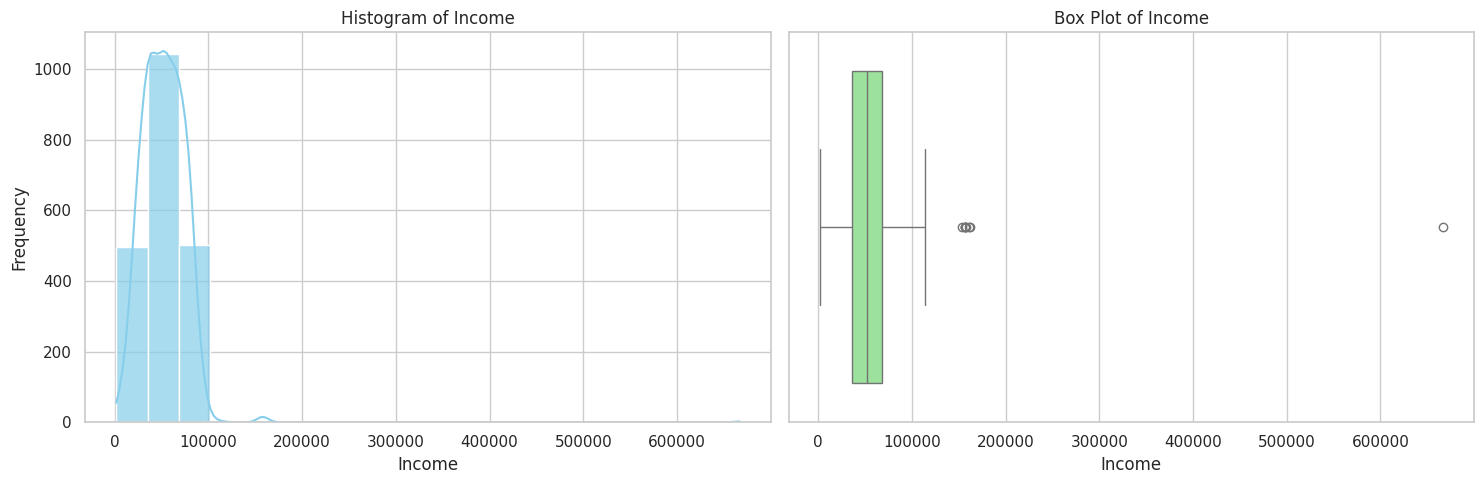

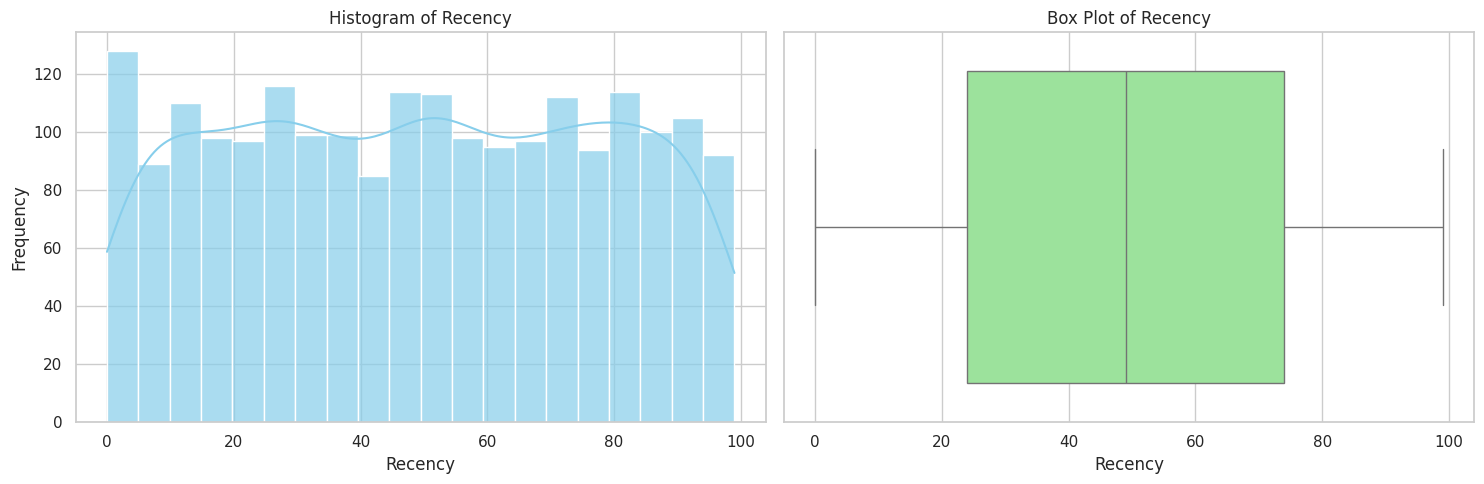

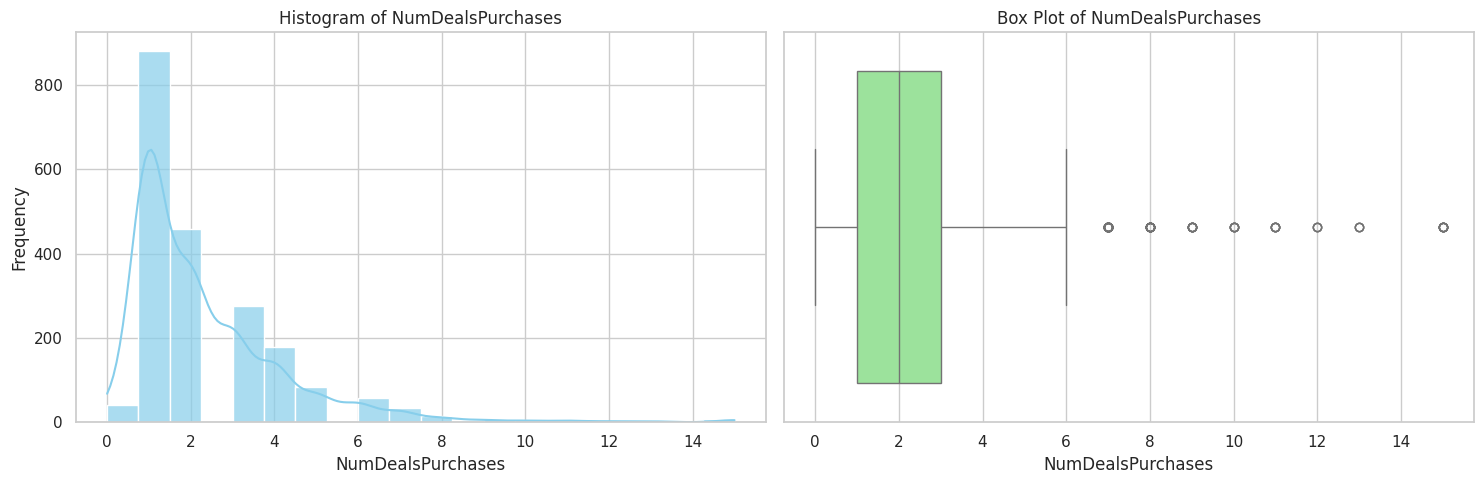

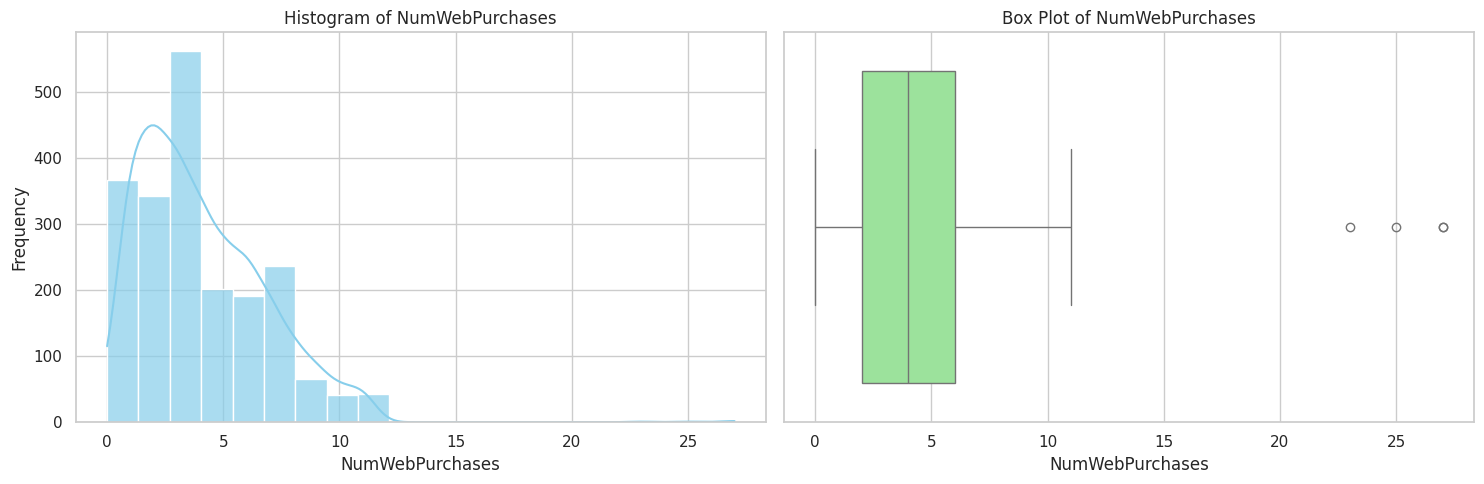

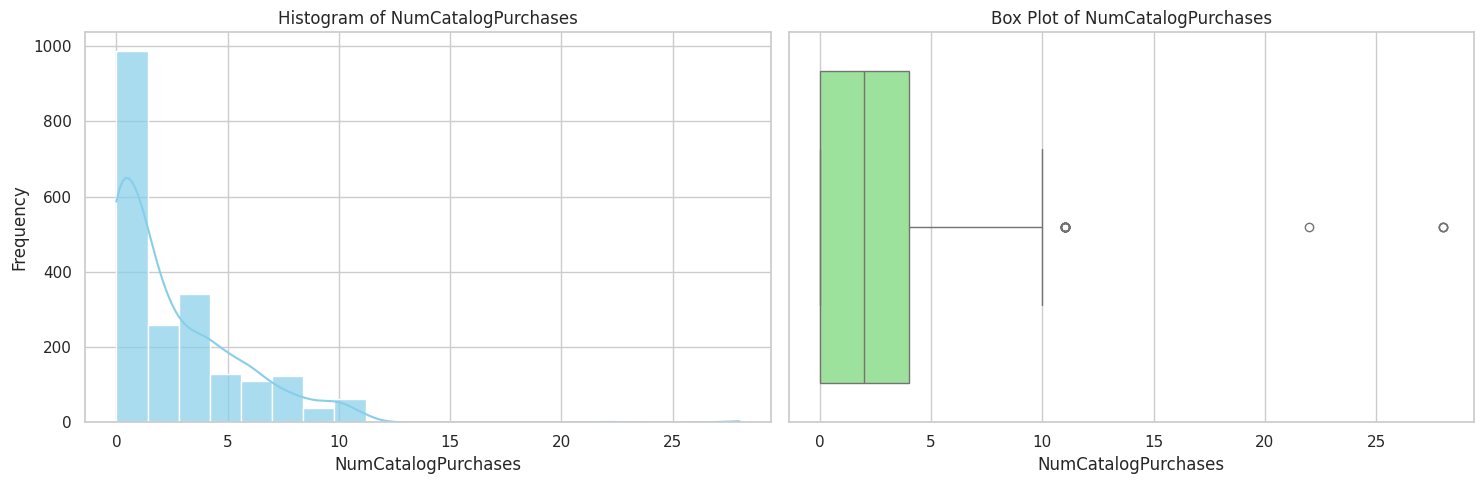

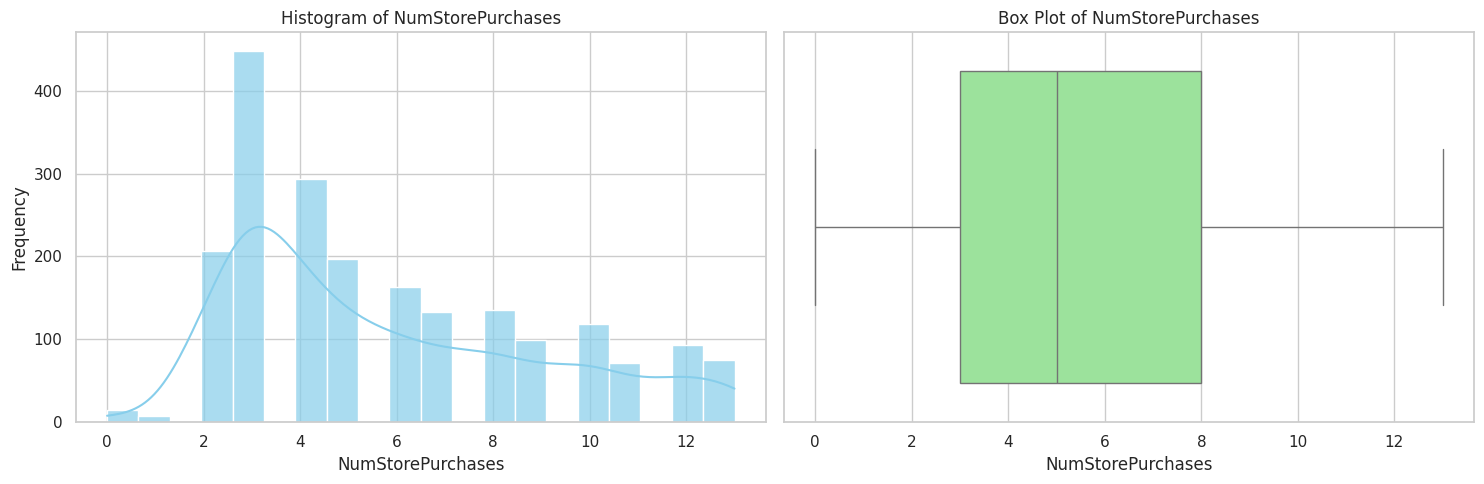

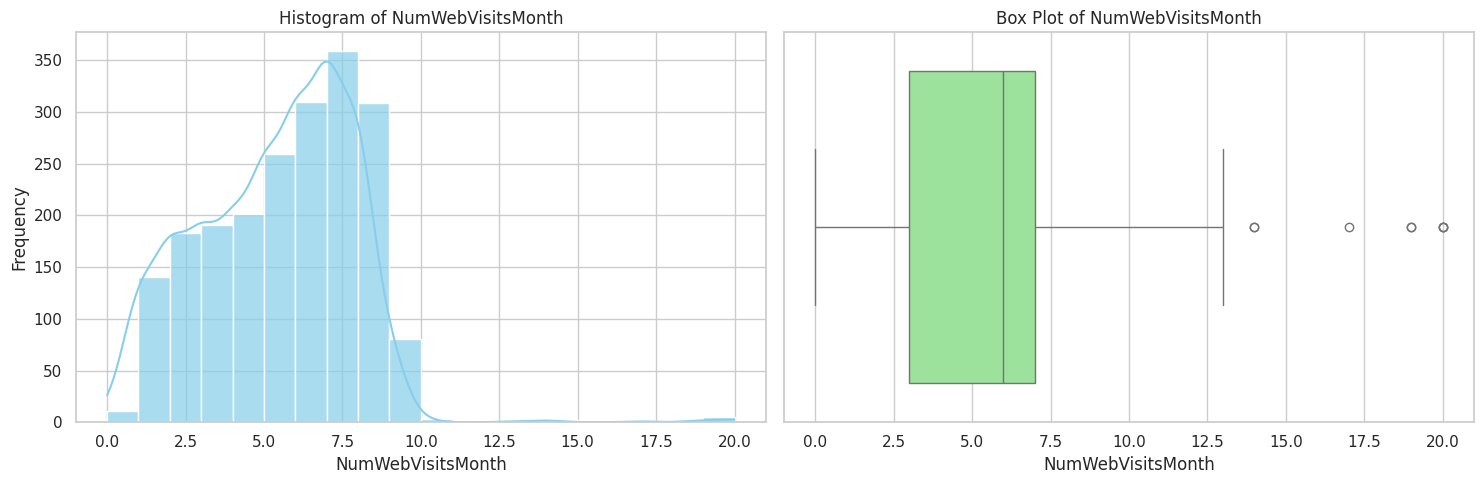

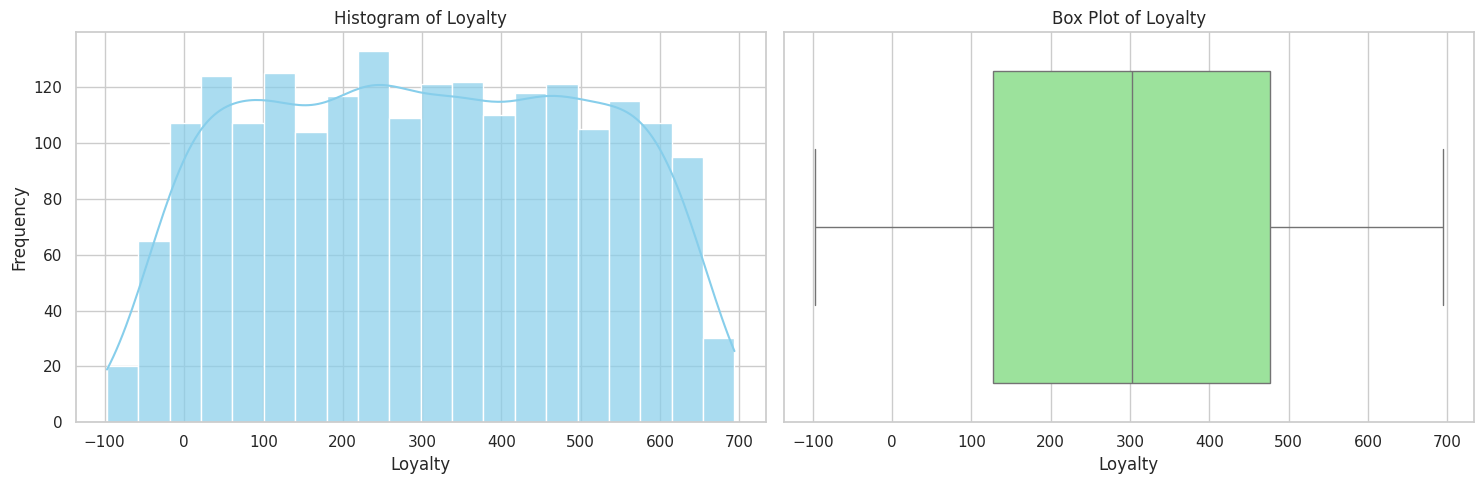

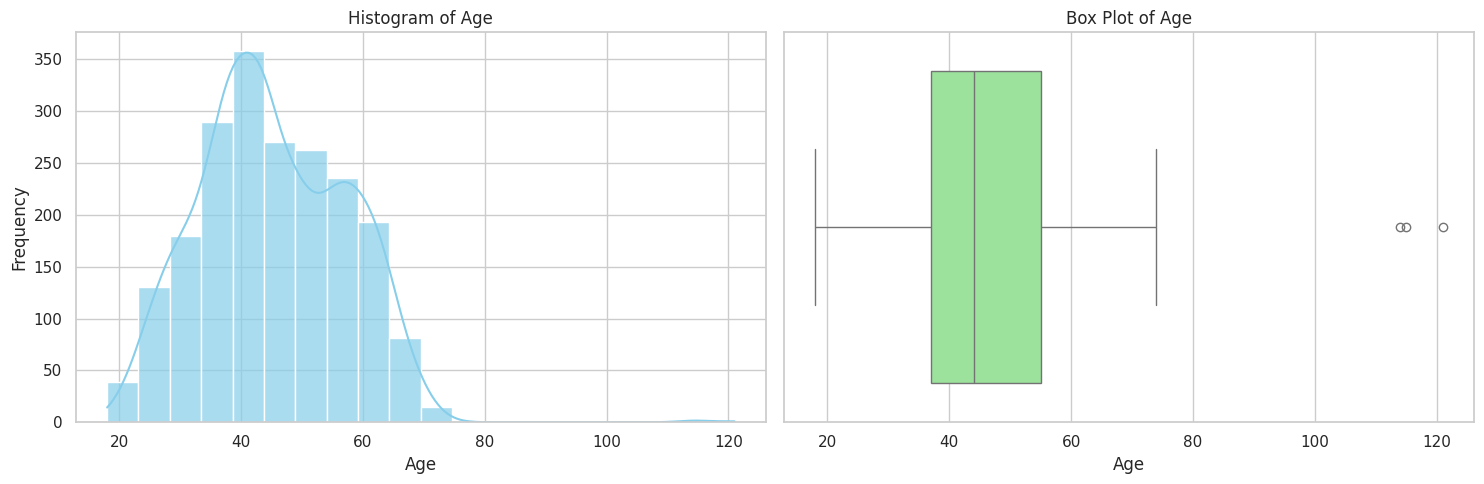

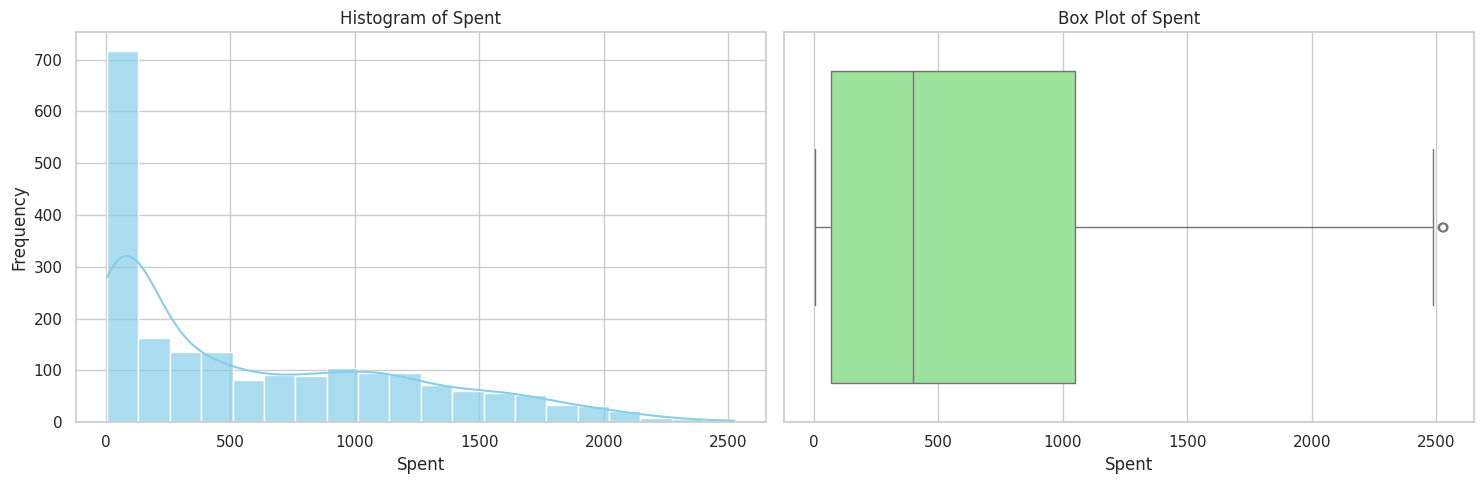

In [ ]:
#num_col
for column in num_col:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    sns.histplot(data=df, x=column, kde=True, bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Box plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.boxplot(data=df, x=column, color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

In [ ]:
df.shape

(2055, 17)

In [ ]:
# Dropping the outliers
# List of features to check for outliers
features = ['Income', 'Loyalty', 'Age', 'Spent']

# Loop through each feature
for feature in features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Determine the outlier bounds
    lower_bound = df[df[feature] <= Q1 - 1.5 * IQR].index
    upper_bound = df[df[feature] >= Q3 + 1.5 * IQR].index

    # Drop the outliers
    df.drop(upper_bound, inplace=True)
    df.drop(lower_bound, inplace=True)

In [ ]:
df.shape

(2041, 17)

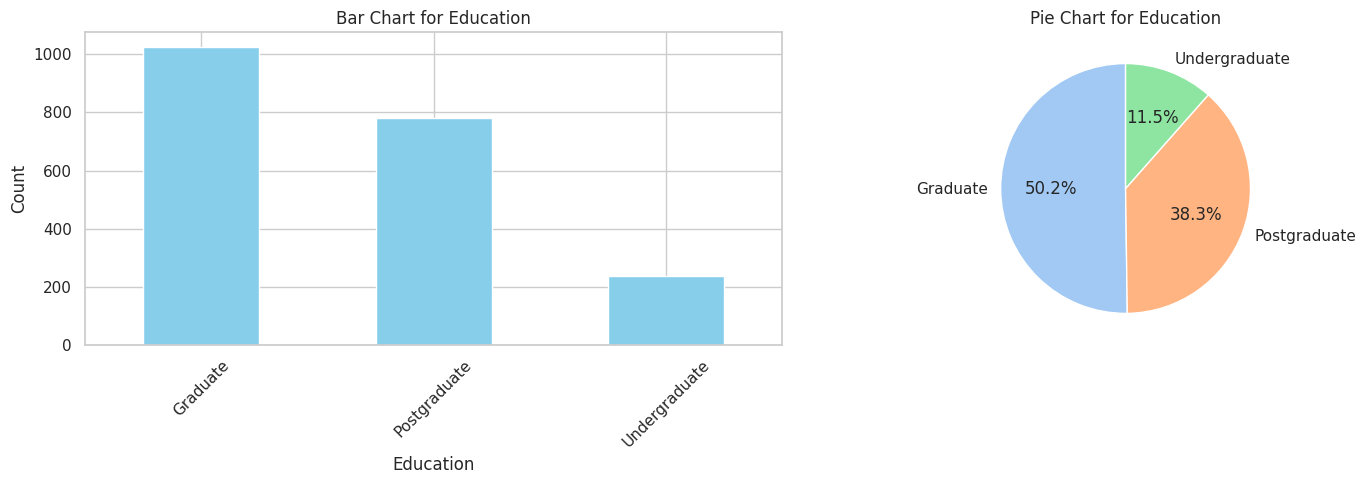

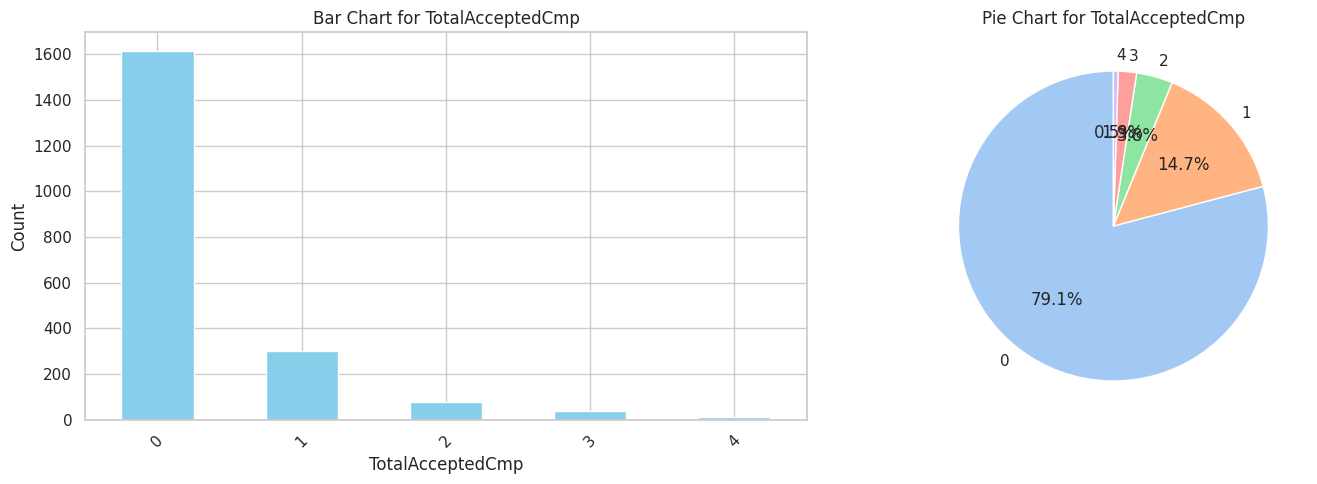

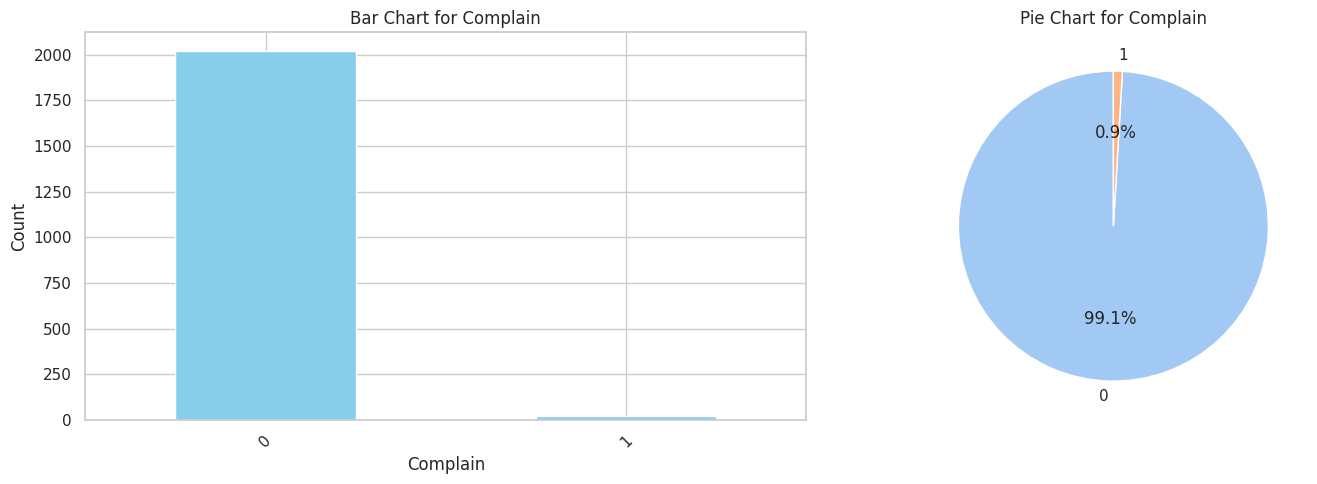

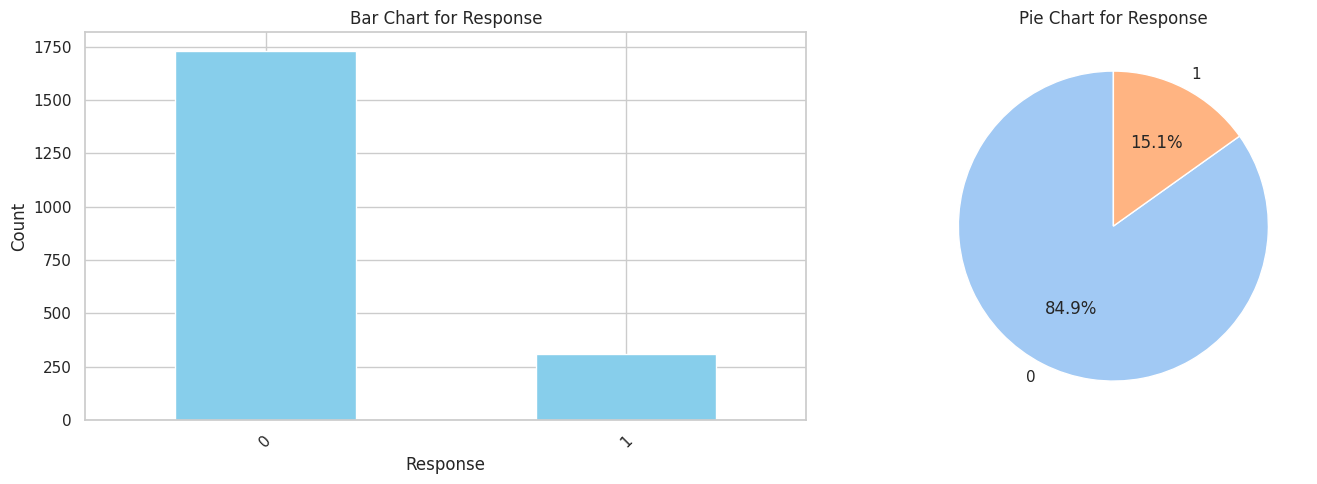

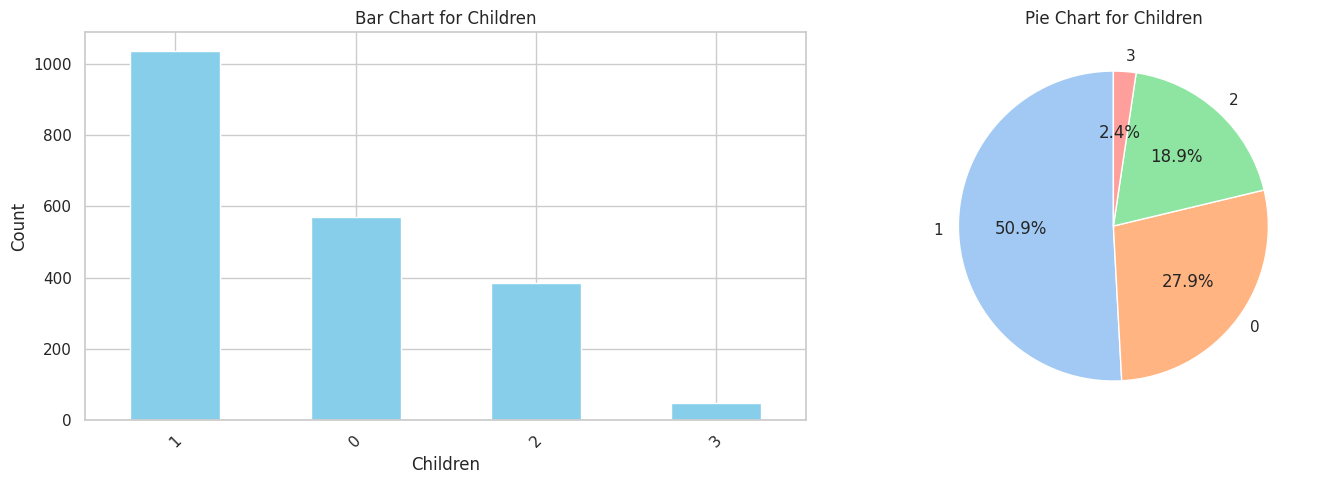

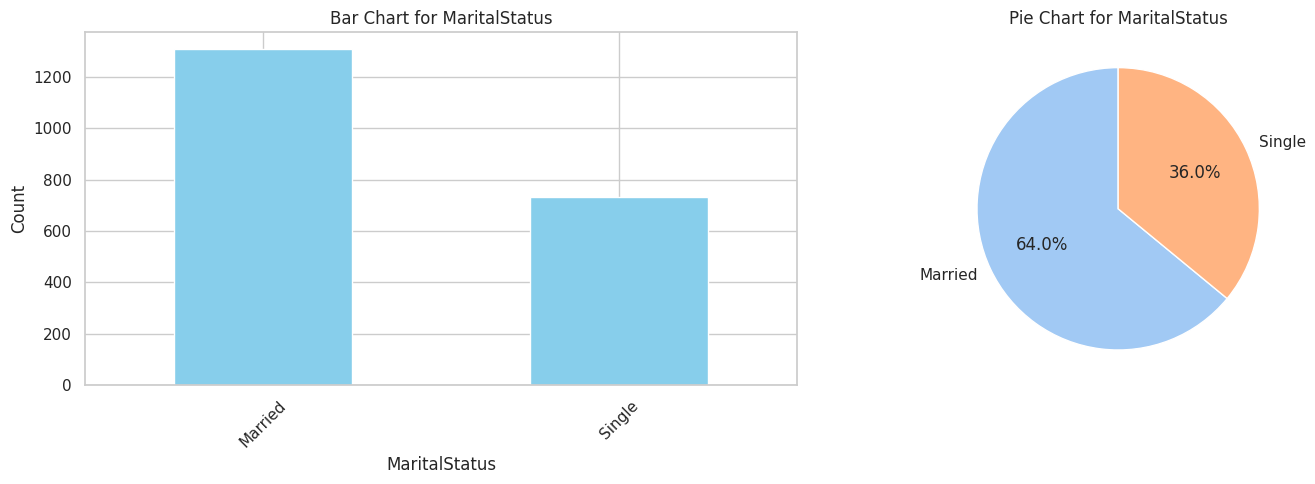

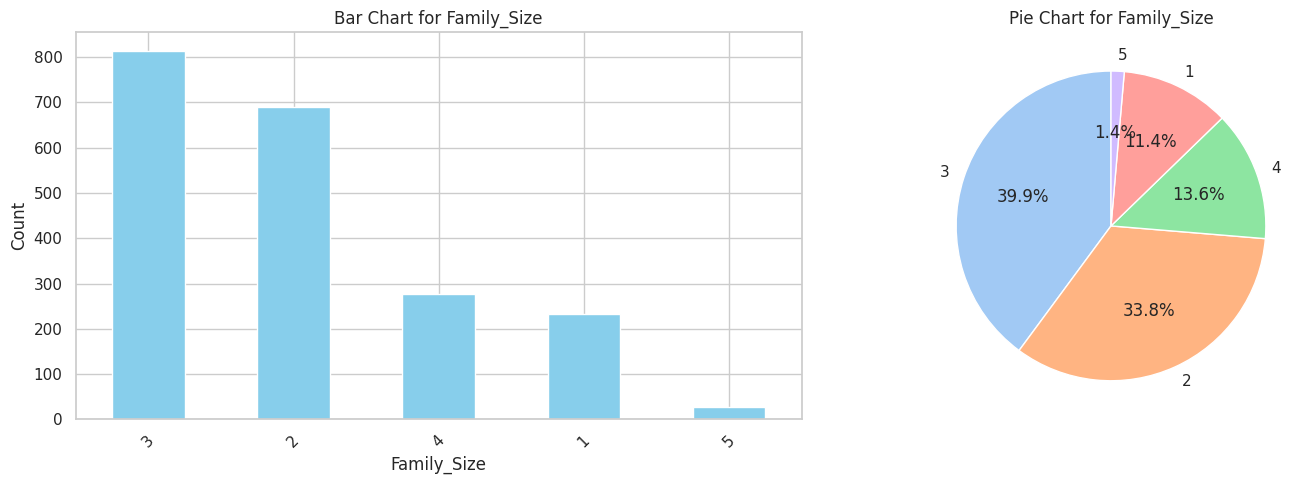

In [ ]:
#cat_col
for col in cat_col:

    # Calculate counts for the categorical column
    counts = df[col].value_counts()

    # Create a figure with two subplots: one for the bar chart and one for the pie chart
    plt.figure(figsize=(15, 5))

    # Bar Chart
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility

    # Pie Chart
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', n_colors=len(counts)))
    plt.title(f'Pie Chart for {col}')
    plt.ylabel('')  # Hide the y-label for better appearance

    plt.tight_layout()
    plt.show()

#####Bivariate Analysis

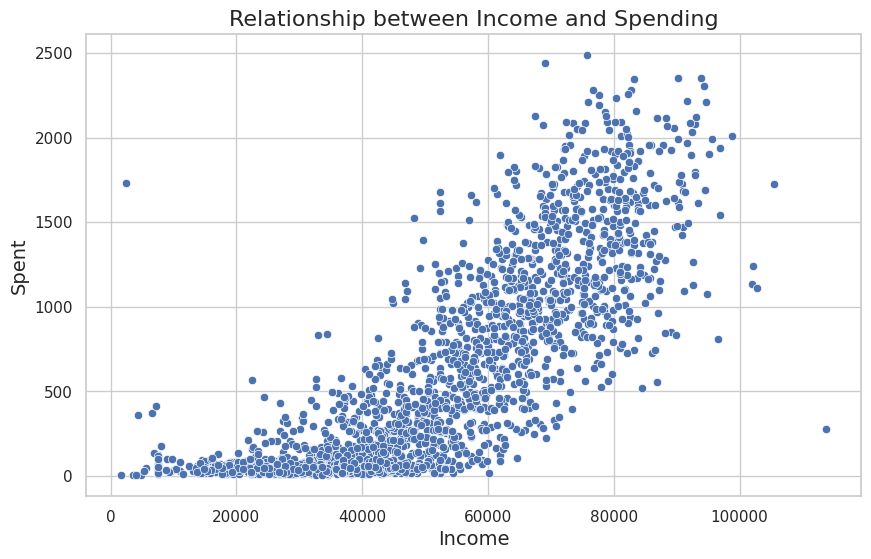

In [ ]:
#Relationship between Income and Spending
sns.set(style="whitegrid")
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Spent', data=df)
# Add titles and labels
plt.title('Relationship between Income and Spending', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Spent', fontsize=14)
# Show the plot
plt.show()

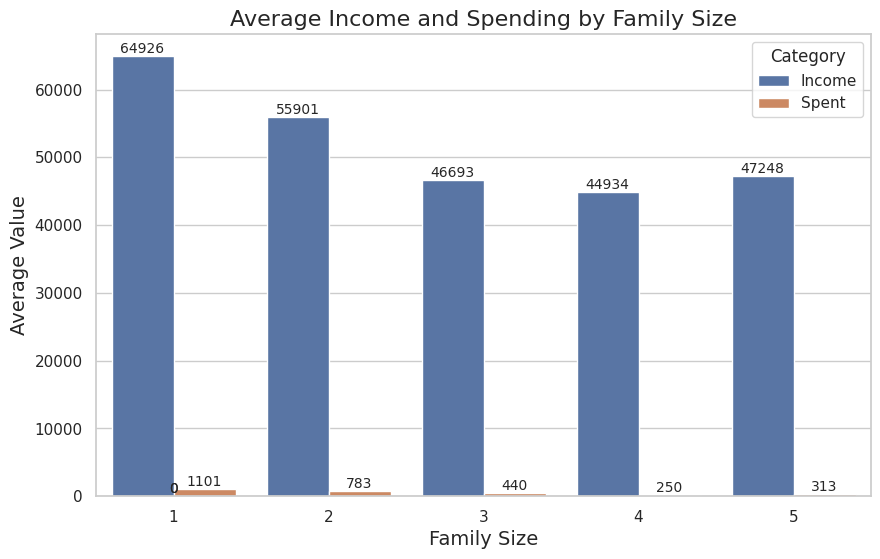

In [ ]:
# Group by Family_Size and calculate the mean Income and Spent
grouped_data = df.groupby('Family_Size').agg({'Income': 'mean', 'Spent': 'mean'}).reset_index()
grouped_data = grouped_data.round({'Income': 0, 'Spent': 0})

# Set the style of seaborn
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting
melted_data = grouped_data.melt(id_vars='Family_Size', value_vars=['Income', 'Spent'],
                                 var_name='Category', value_name='Value')

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot =sns.barplot(x='Family_Size', y='Value', hue='Category', data=melted_data)

# Add titles and labels
plt.title('Average Income and Spending by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Category')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)
# Show the plot
plt.show()


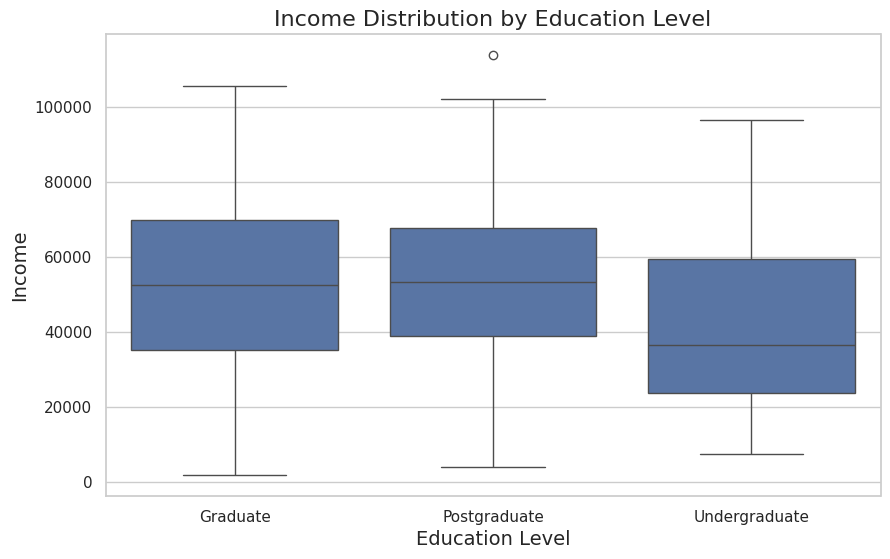

In [ ]:
#Income Distribution by Education Level
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)

# Add titles and labels
plt.title('Income Distribution by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Income', fontsize=14)

# Show the plot
plt.show()

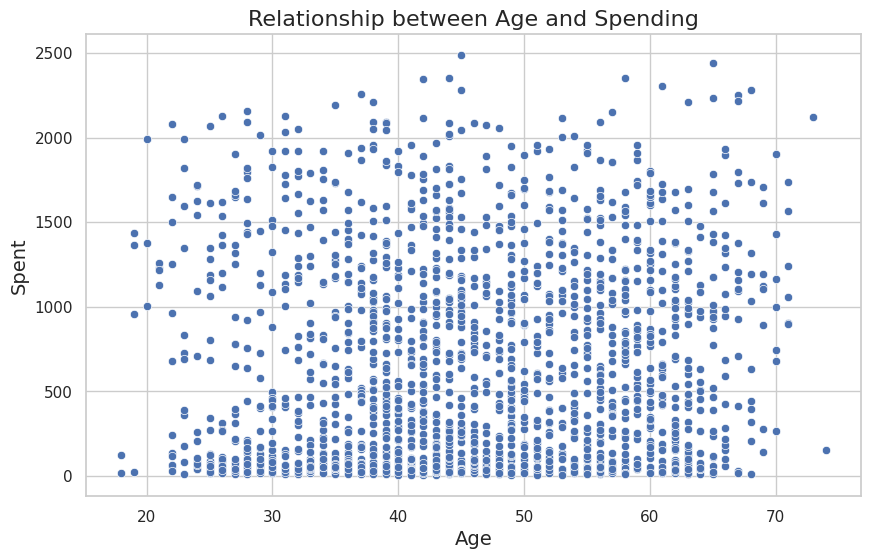

In [ ]:
#Relationship between Age and Spending
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spent', data=df)

# Add titles and labels
plt.title('Relationship between Age and Spending', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Spent', fontsize=14)

# Show the plot
plt.show()

In [ ]:
  df.corr(numeric_only=True)

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Loyalty,Age,Children,Spent,TotalAcceptedCmp,Family_Size
Income,1.000000,0.001966,-0.132762,0.486026,0.701741,0.679010,-0.638872,-0.026525,0.172875,-0.016790,0.221015,-0.349945,0.814797,0.382344,-0.294643
Recency,0.001966,1.000000,0.005241,-0.011420,0.019226,0.000844,-0.016389,-0.001433,-0.202798,-0.113213,0.016562,0.028546,0.015857,-0.015441,0.021191
NumDealsPurchases,-0.132762,0.005241,1.000000,0.235445,-0.043653,0.073056,0.364639,0.001770,-0.000072,0.218179,0.065301,0.441634,-0.071569,-0.120824,0.377714
NumWebPurchases,0.486026,-0.011420,0.235445,1.000000,0.403589,0.486646,-0.061855,-0.011312,0.143924,0.198520,0.152476,-0.159262,0.522566,0.193975,-0.132888
NumCatalogPurchases,0.701741,0.019226,-0.043653,0.403589,1.000000,0.561686,-0.521449,-0.014585,0.233139,0.100632,0.144938,-0.451423,0.793715,0.360137,-0.381696
NumStorePurchases,0.679010,0.000844,0.073056,0.486646,0.561686,1.000000,-0.439029,-0.007956,0.032391,0.111117,0.147275,-0.331189,0.677498,0.210561,-0.267649
NumWebVisitsMonth,-0.638872,-0.016389,0.364639,-0.061855,-0.521449,-0.439029,1.000000,0.015761,-0.004974,0.271084,-0.126505,0.409644,-0.491169,-0.163529,0.339236
Complain,-0.026525,-0.001433,0.001770,-0.011312,-0.014585,-0.007956,0.015761,1.000000,0.001757,0.032390,-0.002266,0.025971,-0.031469,-0.020249,0.020505
Response,0.172875,-0.202798,-0.000072,0.143924,0.233139,0.032391,-0.004974,0.001757,1.000000,0.219935,-0.019551,-0.176845,0.262301,0.418814,-0.224262
Loyalty,-0.016790,-0.113213,0.218179,0.198520,0.100632,0.111117,0.271084,0.032390,0.219935,1.000000,-0.016818,-0.032987,0.167251,-0.007486,-0.035299


<Axes: >

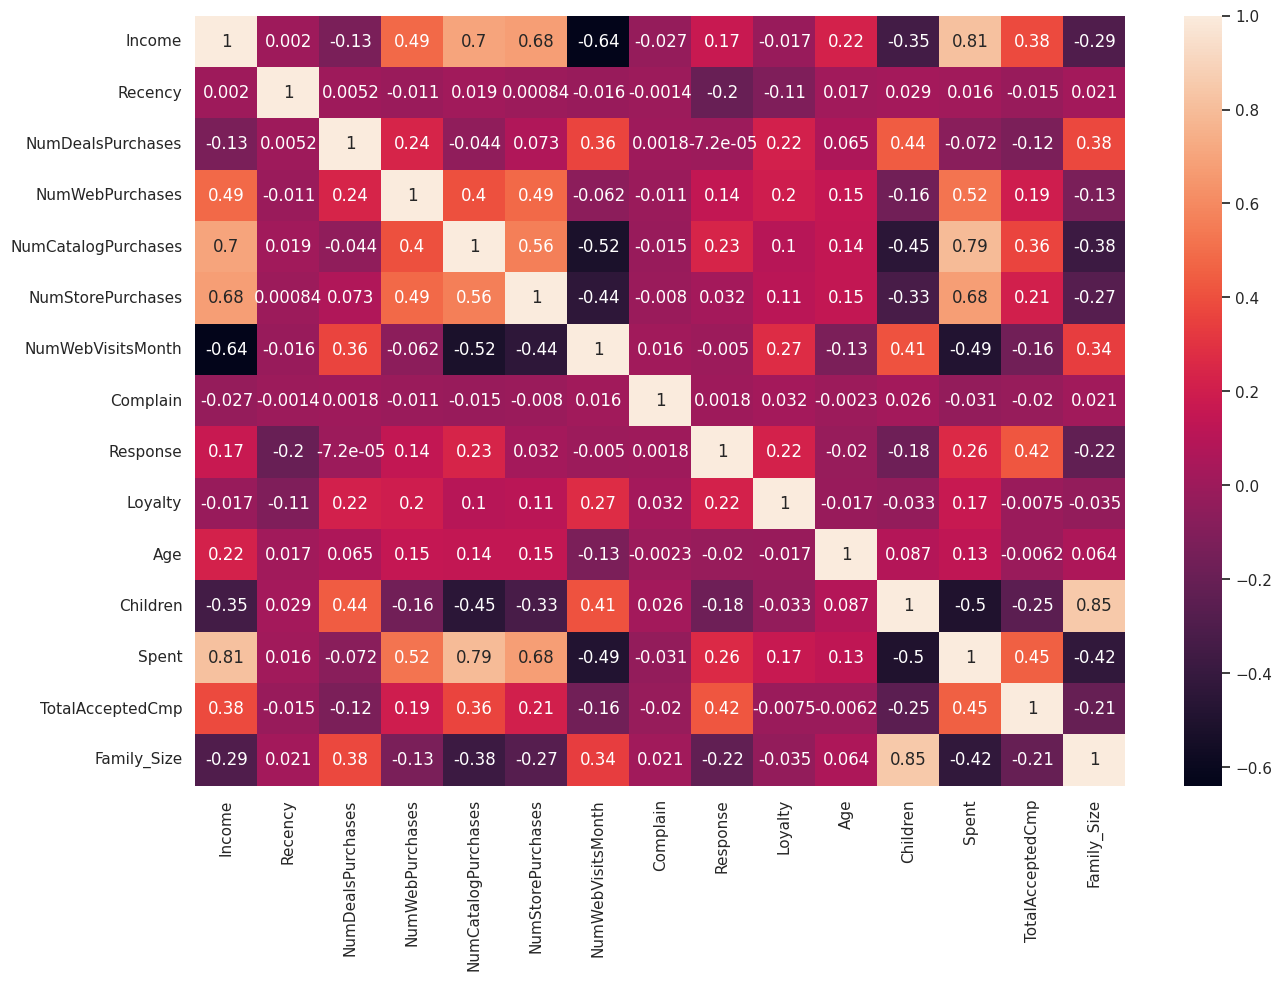

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

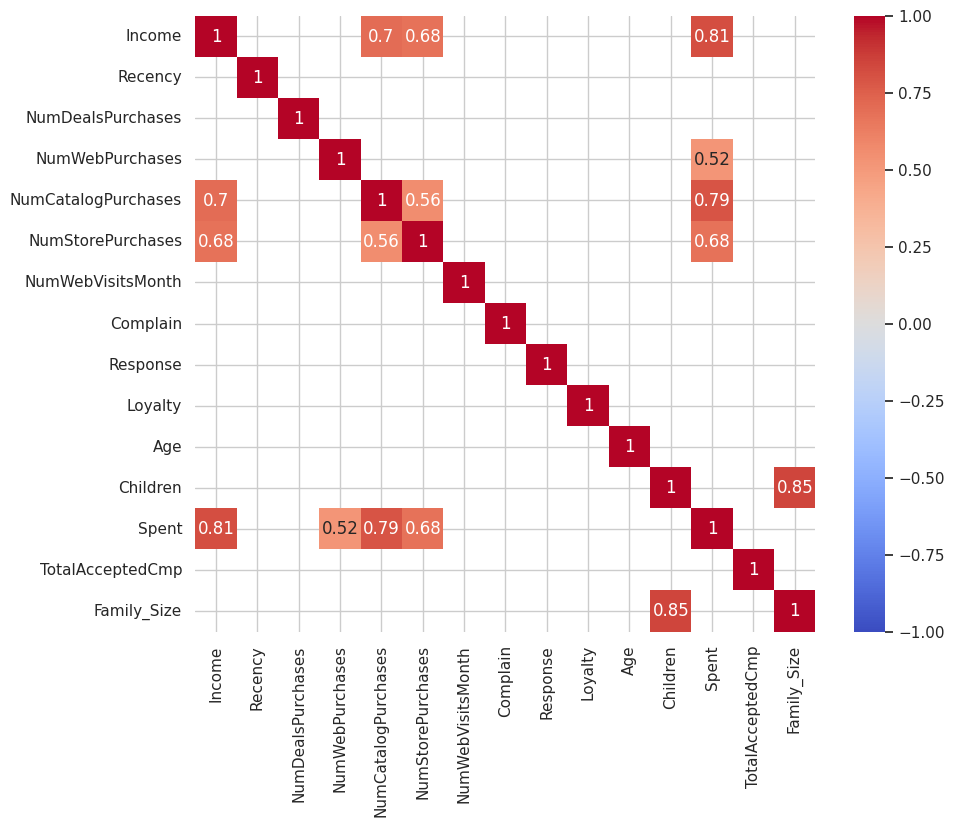

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Mask values that are less than or equal to 0.5
mask = correlation_matrix <= 0.5

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

# Display the heatmap
plt.show()

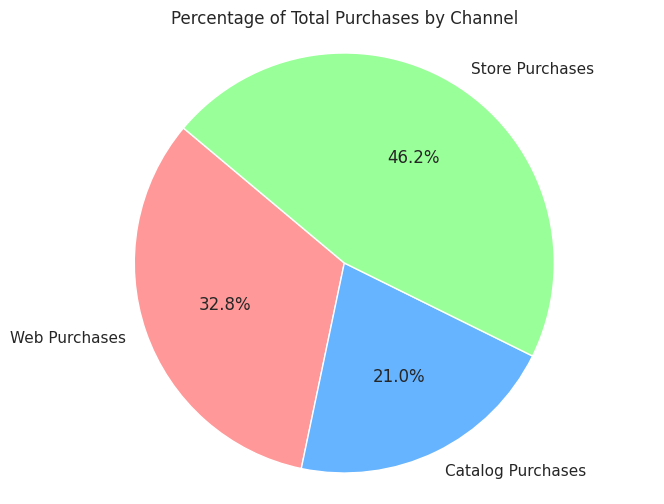

In [ ]:
# Calculate total purchases for each channel
total_web_purchases = df['NumWebPurchases'].sum()
total_catalog_purchases = df['NumCatalogPurchases'].sum()
total_store_purchases = df['NumStorePurchases'].sum()

# Calculate total purchases across all channels
total_purchases = total_web_purchases + total_catalog_purchases + total_store_purchases

# Calculate percentages
percentage_web = (total_web_purchases / total_purchases) * 100 if total_purchases > 0 else 0
percentage_catalog = (total_catalog_purchases / total_purchases) * 100 if total_purchases > 0 else 0
percentage_store = (total_store_purchases / total_purchases) * 100 if total_purchases > 0 else 0

# Prepare data for the pie chart
labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']
sizes = [total_web_purchases, total_catalog_purchases, total_store_purchases]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Colors for the pie chart

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Purchases by Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

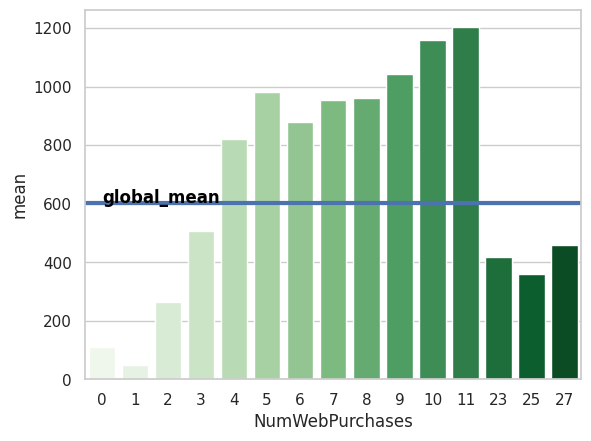

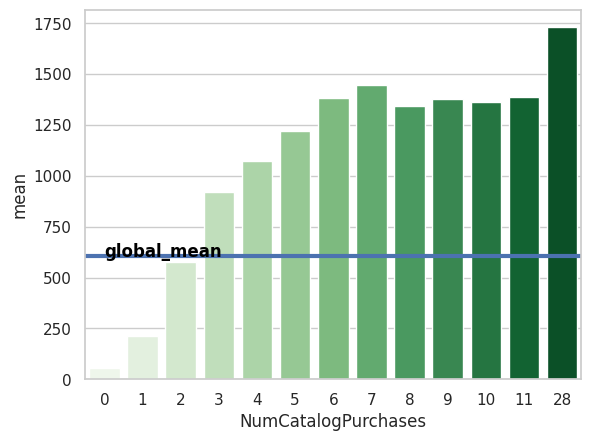

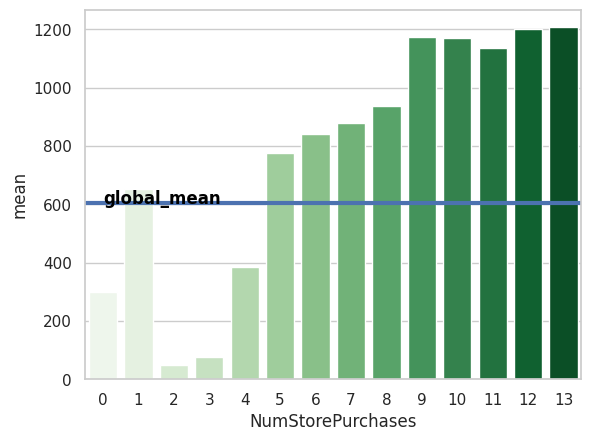

In [ ]:
interested_cols=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
global_mean = df['Spent'].mean()
for feature in interested_cols:
    df_group = df.groupby(by=feature).Spent.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Greens')
    graph.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()


In [ ]:
# Keep data in csv file after cleaning
df.to_csv('Marketing_Campaign_After_Clean.csv', index=False)